# PH413 Computation Physics - Practice [Week 6]

## 1. Web Crawling

## 1.1. urllib

* `urllib` is a powerful library to open and read html file from from internet url.
* Of course, there are other libraries to open url such as `urllib2` (extended version) and `requests` module (known to be better than urllib).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from urllib.request import urlopen

* `urlopen` method requests html file from given url.

In [2]:
html = urlopen("http://en.wikipedia.org/wiki/Ludwig_Boltzmann")
print(html)

* As you can see, requested html file is an object called `HTTPResponse`, which doesn't have explicit `print` method.
* In order to read it, (obviously,) we can employ `read` method.

In [3]:
html_read = html.read()
print(html_read)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Ludwig Boltzmann - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"97af934b-5393-46f2-b2d1-e112b846799c","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Ludwig_Boltzmann","wgTitle":"Ludwig Boltzmann","wgCurRevisionId":1077915904,"wgRevisionId":1077915904,"wgArticleId":544255,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1: long volume value","CS1 Slovenian-language sources (sl)","Articles with short description","Short description is different from Wikid

* The output or html_read file seems like a total mess, but what you see is a 'source code' of the wikipedia html file.
* What we see in our browser is compiled version of this html code.
http://en.wikipedia.org/wiki/Ludwig_Boltzmann

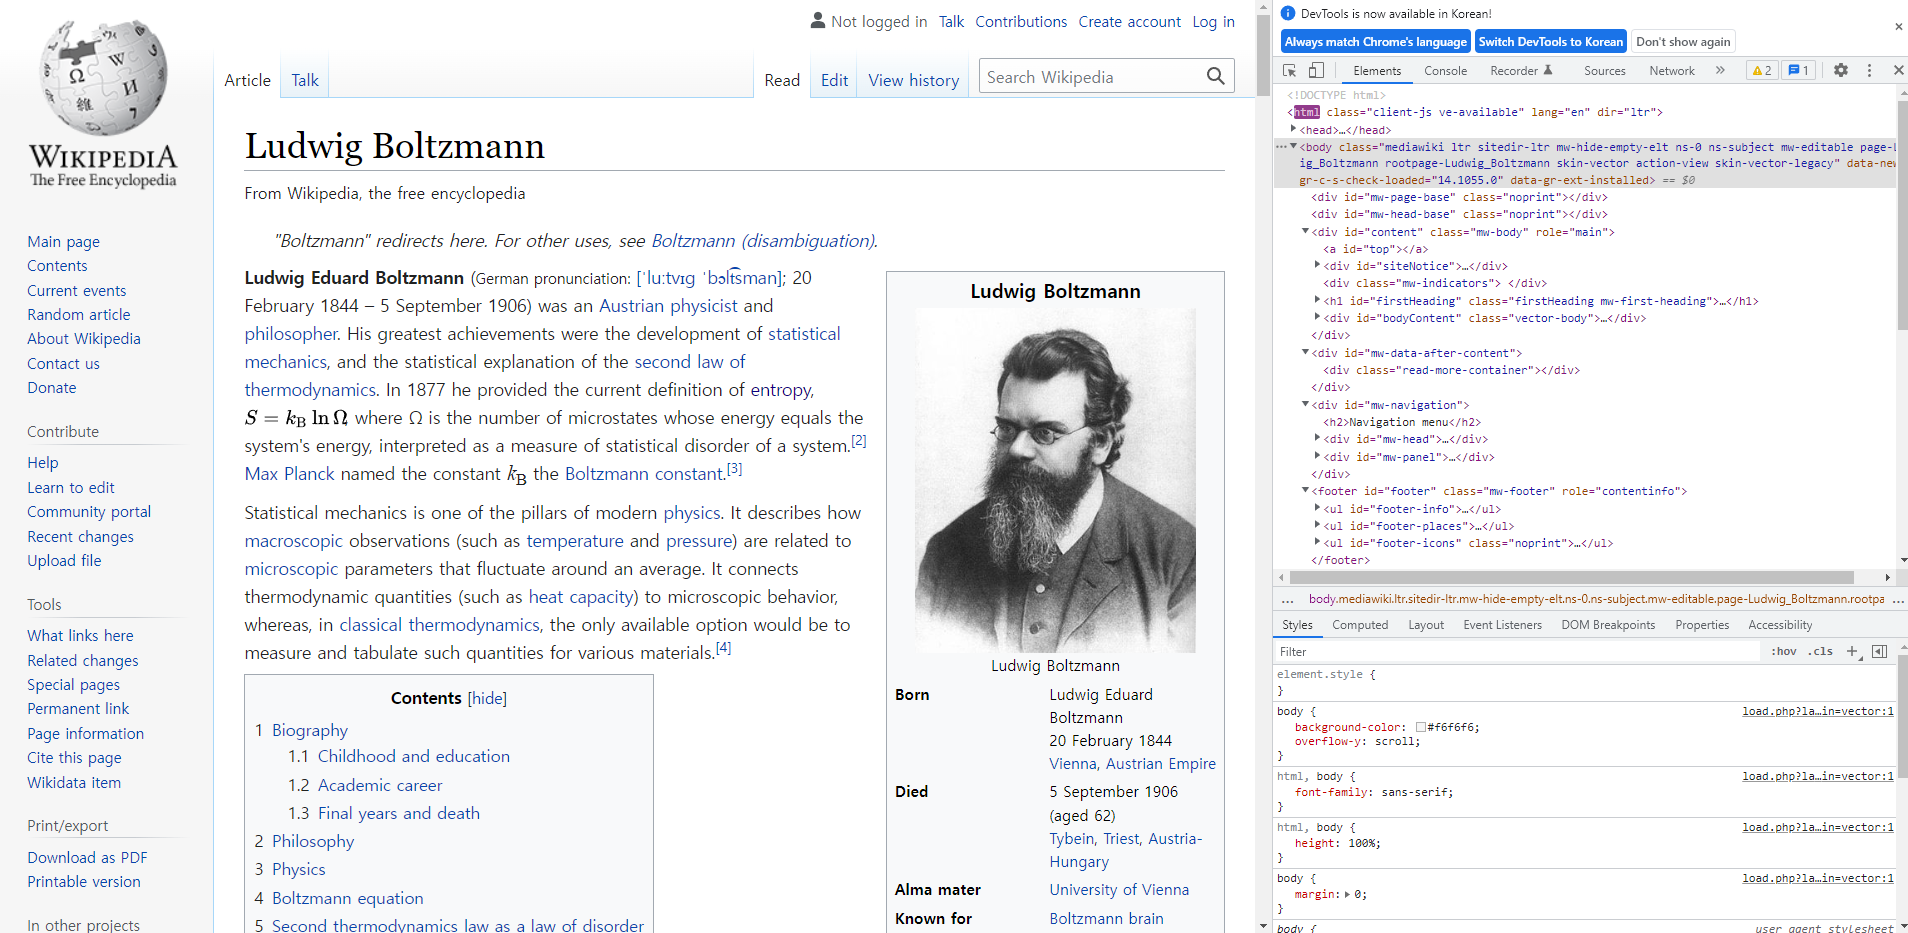

* There are lots of methods in HTMLResponse class, such as `geturl` (returns url), `getcode` (returns code), and `getheaders` (returns headers).
* Header shows various information of the html file, such as requested time, content type, encodings, languase, etc.
* The code from `getcode` method is HTTP status code. (404 is a familiar exmaple.)
![statuscode.png](statuscode.png)

In [4]:
url = html.geturl()
code = html.getcode()
header = html.getheaders()

print("url : " + url)
print("code : " + str(code))
print("header : " + str(header))

url : https://en.wikipedia.org/wiki/Ludwig_Boltzmann
code : 200
header : [('date', 'Mon, 04 Apr 2022 05:02:14 GMT'), ('vary', 'Accept-Encoding,Cookie,Authorization'), ('server', 'ATS/8.0.8'), ('x-content-type-options', 'nosniff'), ('p3p', 'CP="See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."'), ('content-language', 'en'), ('last-modified', 'Fri, 01 Apr 2022 20:24:07 GMT'), ('content-type', 'text/html; charset=UTF-8'), ('age', '29029'), ('x-cache', 'cp5007 miss, cp5016 hit/8'), ('x-cache-status', 'hit-front'), ('server-timing', 'cache;desc="hit-front", host;desc="cp5016"'), ('strict-transport-security', 'max-age=106384710; includeSubDomains; preload'), ('report-to', '{ "group": "wm_nel", "max_age": 86400, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }'), ('nel', '{ "report_to": "wm_nel", "max_age": 86400, "failure_fraction": 0.05, "success_fr

** ======================== ★ Task 1 ★ ======================== **
* English wikipedia has articles of numbers, such as 1, 2, and 100. Gather the 'Content-Length' of wiki articles corresponds to the name of 1 through 8. Guess the longest article and shortest article before you actually crawl the data.


* Plot those content length of 8 articles. Does it match to your prior expectation?
    
** ========================================================== **

## 1.2. beautifulsoup

* Although we can manually process our html data, it'll be much easier if we have an automated parser.
* In python, `beautifulsoup` could be a suitable choice.
* If `beautifulsoup` is not installed in your python, please enter the following command at the conda prompt

```bash
conda install beautifulsoup4
```
or
```bash
pip install beautifulsoup4
```

In [5]:
from bs4 import BeautifulSoup

html = urlopen("http://en.wikipedia.org/wiki/Ludwig_Boltzmann").read()
soup = BeautifulSoup(html, "html.parser")

* Inside this soup object, you can employ various methods to process your html file.
* Soup object supports various finding, splicing, and analyzing methods in order to process our data.

In [6]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Ludwig Boltzmann - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"97af934b-5393-46f2-b2d1-e112b846799c","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Ludwig_Boltzmann","wgTitle":"Ludwig Boltzmann","wgCurRevisionId":1077915904,"wgRevisionId":1077915904,"wgArticleId":544255,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1: long volume value","CS1 Slovenian-language sources (sl)","Articles with short description","Short description is different from Wikidata","

* As you can see from example, typical html tag has the form of `<name attributes : value, attributes : value, ...></name>`.
* If you want to know about basic html structures, I recommend [this](https://ofcourse.kr/html-course/HTML-%EC%9E%85%EB%AC%B8) website.

In [7]:
# Here, the <a> tag defines a hyperlink, which is used to link from one page to another.
# ex] <a href="/wiki/Vienna" title="Vienna">Vienna</a>

a = soup.find("a")
print(a)
print(a.attrs)

<a id="top"></a>
{'id': 'top'}


In [8]:
a_list = soup.findAll("a")
a_list

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#searchInput">Jump to search</a>,
 <a class="mw-disambig" href="/wiki/Boltzmann_(disambiguation)" title="Boltzmann (disambiguation)">Boltzmann (disambiguation)</a>,
 <a class="image" href="/wiki/File:Boltzmann2.jpg"><img alt="Boltzmann2.jpg" data-file-height="600" data-file-width="490" decoding="async" height="276" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Boltzmann2.jpg/225px-Boltzmann2.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Boltzmann2.jpg/338px-Boltzmann2.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Boltzmann2.jpg/450px-Boltzmann2.jpg 2x" width="225"/></a>,
 <a href="/wiki/Vienna" title="Vienna">Vienna</a>,
 <a href="/wiki/Austrian_Empire" title="Austrian Empire">Austrian Empire</a>,
 <a class="mw-redirect" href="/wiki/Tybein" title="Tybein">Tybein</a>,
 <a class="mw-redirect" href="/wiki/Triest" title="Triest">Tr

* Note that although print function shows these like a normal python list, they are special class defined by beautifulsoup.

In [9]:
print(type(a_list))
print(type(a_list[0]))

<class 'bs4.element.ResultSet'>
<class 'bs4.element.Tag'>


* You can access to those Set and Tag to specify attribute conditions you want to find.

In [12]:
x = soup.find(id = 'Physics') # try 'Biography', 'Philosophy', 'Boltzmann_equation', and etc.
print(x)
print(x.get_text())

<span class="mw-headline" id="Physics">Physics</span>
Physics


** ======================== ★ Task 2 ★ ======================== **
* Go to https://www.rottentomatoes.com/top/ and crawl top-box-office table to print the name of top 10 movies today with its rank.

* HINT : If your tag have an attribute `class`, you have to find `class_` since the keyword `class` is already booked by python.   
    
** ========================================================== **

**==================== ★★ Assignment1 ★★ ====================**

* Verify whether a set of numbers satisfy Benford's law from the Wikipedia page on physical constants
    http://en.wikipedia.org/wiki/Physical_constant
        
* Benford's law: For the leading digit $d \in \{1, 2, \dots, 9\}$, $d$ occurs with probability $p(d) = \log_{10} \left( 1 + 1/d \right)$

* You don't have to compare the two distributions exactly.
    
**============================================================**   

## END OF WEEK 6! Have a good day :)